In [24]:
import sys
import numpy as np
from PIL import Image
import cv2
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

%matplotlib inline

sys.path.append("..")

In [ ]:
def collapse(array):
    collapsed = np.zeros( (array.shape[0],array.shape[1]) )
    

In [94]:
colors_list = [
              [0,0,0],  #1_BLACK background
              [0,0,250],[0,0,255],[50,150,250], #2_BLUE cavities
              [150,100,100],[150,122,132], #3_BROWN hilar lymphopathy
              [255, 0,0],[250,0,0],[250,0,26], #4_RED infilteration
              [255,255,0],[250,150,50],[255,255,150], #5_YELLOW fibrosis
              [255,0,250],[250,0,250],[250,0,255],[255,0,255],[200,50,250],[200,50,255],[250,50,255], #PINK consolidation
              [0,250,0],[0,255,0], #7_LIGHT GREEN nodule
              [150,250,250],[150,255,255],[155,255,255],[0,255,255], #8_CYAN pleural thickening
              [200,0,255], [100,100,200], #9_PURPLE calcification
              [50,150,100], #10_GREEN pleural effussion
              [250,200,150] #11_PEACH abnormality TB
              ] # for example. there are more classes like this


labels_dic = {(0, 0, 0): 0,
            (0, 0, 250): 1,
            (0, 0, 255): 1,
            (50, 150, 250): 1,
            (150, 100, 100): 2,
            (150, 122, 132): 2,
            (255, 0, 0): 3,
            (250, 0, 0): 3,
            (250, 0, 26): 3,
            (255, 255, 0): 4,
            (250, 150, 50): 4,
            (255, 255, 150): 4,
            (255, 0, 250): 5,
            (250, 0, 250): 5,
            (250, 0, 255): 5,
            (255, 0, 255): 5,
            (200, 50, 250): 5,
            (200, 50, 255): 5,
            (250, 50, 255): 5,
            (0, 250, 0): 6,
            (0, 255, 0): 6,
            (150, 250, 250): 7,
            (150, 255, 255): 7,
            (155, 255, 255): 7,
            (0, 255, 255): 7,
            (200, 0, 255): 8,
            (100, 100, 200): 8,
            (50, 150, 100): 9,
            (250, 200, 150): 10}

In [82]:
labels_dic = {tuple(k):v for k,v in zip(label_list, label_num)}

In [83]:
labels_dic

{(0, 0, 0): 0,
 (0, 0, 250): 1,
 (0, 0, 255): 1,
 (50, 150, 250): 1,
 (150, 100, 100): 2,
 (150, 122, 132): 2,
 (255, 0, 0): 3,
 (250, 0, 0): 3,
 (250, 0, 26): 3,
 (255, 255, 0): 4,
 (250, 150, 50): 4,
 (255, 255, 150): 4,
 (255, 0, 250): 5,
 (250, 0, 250): 5,
 (250, 0, 255): 5,
 (255, 0, 255): 5,
 (200, 50, 250): 5,
 (200, 50, 255): 5,
 (250, 50, 255): 5,
 (0, 250, 0): 6,
 (0, 255, 0): 6,
 (150, 250, 250): 7,
 (150, 255, 255): 7,
 (155, 255, 255): 7,
 (0, 255, 255): 7,
 (200, 0, 255): 8,
 (100, 100, 200): 8,
 (50, 150, 100): 9,
 (250, 200, 150): 10}

In [88]:
from pprint import pprint

pprint(labels_dic)

{(0, 0, 0): 0,
 (0, 0, 250): 1,
 (0, 0, 255): 1,
 (0, 250, 0): 6,
 (0, 255, 0): 6,
 (0, 255, 255): 7,
 (50, 150, 100): 9,
 (50, 150, 250): 1,
 (100, 100, 200): 8,
 (150, 100, 100): 2,
 (150, 122, 132): 2,
 (150, 250, 250): 7,
 (150, 255, 255): 7,
 (155, 255, 255): 7,
 (200, 0, 255): 8,
 (200, 50, 250): 5,
 (200, 50, 255): 5,
 (250, 0, 0): 3,
 (250, 0, 26): 3,
 (250, 0, 250): 5,
 (250, 0, 255): 5,
 (250, 50, 255): 5,
 (250, 150, 50): 4,
 (250, 200, 150): 10,
 (255, 0, 0): 3,
 (255, 0, 250): 5,
 (255, 0, 255): 5,
 (255, 255, 0): 4,
 (255, 255, 150): 4}


In [92]:
def gen_mask(image):
    shape = (image.shape[0], image.shape[1])
    mask = np.zeros(shape)
    
    for c in colors_list:
        np.where(img==c)
    
    for x in range(shape[0]):
        for y in range(shape[1]):
            key = tuple(image[x,y])
            try:
                mask[x,y] = labels_dic[key]
            except:
                pass
    
    return mask



In [93]:
for file in tqdm(glob.glob("../data/xray_segmented_images/*")):
    img = cv2.imread(file)
    img = gen_mask(img)

  0%|          | 2/452 [00:37<2:20:42, 18.76s/it]


KeyboardInterrupt: 

In [95]:
a = np.array([[0, 1, 2],
              [0, 2, 4],
              [0, 3, 6]])

In [99]:
glob.glob("../data/class_labelled/*")

['../data/class_labelled/TB 196-F0.png',
 '../data/class_labelled/TB 29-F3.png',
 '../data/class_labelled/TB 209-F1.png',
 '../data/class_labelled/TB 62-F2.png',
 '../data/class_labelled/TB 37-F3.png',
 '../data/class_labelled/TB 217-F1.png',
 '../data/class_labelled/TB 177-F3.png',
 '../data/class_labelled/TB 233-F0.png',
 '../data/class_labelled/TB 184-F0.png',
 '../data/class_labelled/TB 153-F2.png',
 '../data/class_labelled/TB 91-F1.png',
 '../data/class_labelled/TB 205-F1.png',
 '../data/class_labelled/TB 130-F2.png',
 '../data/class_labelled/TB 58-F2.png',
 '../data/class_labelled/TB 205-F0.png',
 '../data/class_labelled/TB 91-F0.png',
 '../data/class_labelled/TB 153-F3.png',
 '../data/class_labelled/TB 184-F1.png',
 '../data/class_labelled/TB 177-F2.png',
 '../data/class_labelled/TB 217-F0.png',
 '../data/class_labelled/TB 188-F1.png',
 '../data/class_labelled/TB 83-F0.png',
 '../data/class_labelled/TB 169-F2.png',
 '../data/class_labelled/TB 29-F2.png',
 '../data/class_labelled

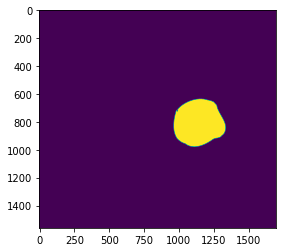

In [111]:
plt.imshow(cv2.imread("../data/class_labelled/TB 196-F0.png",cv2.IMREAD_GRAYSCALE)-1)

In [96]:
a

array([[0, 1, 2],
       [0, 2, 4],
       [0, 3, 6]])

In [107]:
np.array(Image.open("../data/class_labelled/TB 196-F0.png")).shape

(1560, 1698)

In [97]:
a[a==[0,1,2]]

array([0, 1, 2, 0, 0])

In [98]:
np.where(a==[0,1,2])

(array([0, 0, 0, 1, 2]), array([0, 1, 2, 0, 0]))

In [43]:
# Single Image case
img = cv2.imread("../data/xray_segmented_images/TB 196-F0.png")
# img = Image.open("../data/xray_segmented_images/TB 196-F0.png")

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [69]:
def collapse(image):
    shape = (image.shape[0], image.shape[1])
    out = np.zeros(shape)
    
    for x in range(shape[0]):
        for y in rangezzzz(shape[1]):
            out[(x,y)] = (image[0], image[1], image[2])
    
    return out

In [68]:
np.reshape(x, (2,2))

ValueError: cannot reshape array of size 8 into shape (2,2)

In [67]:
x = np.array(
[
[[1,2],[3,4]],
[[5,6],[7,8]]
]
)
x.shape

(2, 2, 2)

(1560, 1698, 3)

In [32]:
np.unique(img)

array([1, 6], dtype=uint8)

In [76]:
for file in tqdm(glob.glob("../data/")):
    im = Image.open(file)
    im = np.array(im)
    im = one_hot(im)

  0%|          | 0/1 [00:00<?, ?it/s]


IsADirectoryError: [Errno 21] Is a directory: '../data/'

In [79]:
glob.glob("../data/xray_segmented_images/*")

['../data/xray_segmented_images/TB 196-F0.png',
 '../data/xray_segmented_images/TB 29-F3.png',
 '../data/xray_segmented_images/TB 209-F1.png',
 '../data/xray_segmented_images/TB 62-F2.png',
 '../data/xray_segmented_images/TB 37-F3.png',
 '../data/xray_segmented_images/TB 217-F1.png',
 '../data/xray_segmented_images/TB 177-F3.png',
 '../data/xray_segmented_images/TB 233-F0.png',
 '../data/xray_segmented_images/TB 184-F0.png',
 '../data/xray_segmented_images/TB 153-F2.png',
 '../data/xray_segmented_images/TB 91-F1.png',
 '../data/xray_segmented_images/TB 205-F1.png',
 '../data/xray_segmented_images/TB 130-F2.png',
 '../data/xray_segmented_images/TB 58-F2.png',
 '../data/xray_segmented_images/TB 205-F0.png',
 '../data/xray_segmented_images/TB 91-F0.png',
 '../data/xray_segmented_images/TB 153-F3.png',
 '../data/xray_segmented_images/TB 184-F1.png',
 '../data/xray_segmented_images/TB 177-F2.png',
 '../data/xray_segmented_images/TB 217-F0.png',
 '../data/xray_segmented_images/TB 188-F1.png'

In [85]:
folder_pp = '/class_labelled/'

for filename in images:
    #CORRECT CODE
    #filename="TB 121-F0.png"
    bb=os.path.basename(filename)
    print(bb)
    #label_list = [[0,0,0], [0,0,255]] # for example. there are more classes like this
    image = cv2.imread(filename)
    shape=image.shape
    dim=shape[0]*shape[1]
    new_im=np.zeros(dim)
    new_im = new_im.astype(np.uint8)
    image=np.array(image)
    image2=image.reshape(dim,3)
    for k, l in enumerate(label_list):
        res=(image2[:,None] == l).all(2).any(1)
        inn=np.where(res==True)
        #print(inn)
        for r in inn:
            new_im[r]=label_num[k]
  

  
    new_im=np.where(new_im==0,1,new_im)
    new_im=new_im.reshape(shape[0],shape[1])
    im = Image.fromarray(new_im)
    im.save(folder_pp+bb)
    #break

array([ 0,  1,  1,  1,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  6,  6,  7,  7,  7,  7,  8,  8,  9, 10])

In [ ]:
labels = 

In [84]:
label_list = np.array([
              [0,0,0],  #1_BLACK background
              [0,0,250],[0,0,255],[50,150,250], #2_BLUE cavities
              [150,100,100],[150,122,132], #3_BROWN hilar lymphopathy
              [255, 0,0],[250,0,0],[250,0,26], #4_RED infilteration
              [255,255,0],[250,150,50],[255,255,150], #5_YELLOW fibrosis
              [255,0,250],[250,0,250],[250,0,255],[255,0,255],[200,50,250],[200,50,255],[250,50,255], #PINK consolidation
              [0,250,0],[0,255,0], #7_LIGHT GREEN nodule
              [150,250,250],[150,255,255],[155,255,255],[0,255,255], #8_CYAN pleural thickening
              [200,0,255], [100,100,200], #9_PURPLE calcification
              [50,150,100], #10_GREEN pleural effussion
              [250,200,150] #11_PEACH abnormality TB
              ]) # for example. there are more classes like this

label_num =np.array([
            1,
            2,2,2,
            3,3,
            4,4,4,
            5,5,5,
            6,6,6,6,6,6,6,
            7,7,
            8,8,8,8,
            9,9,
            10,
            11])-1

In [53]:
def one_hot(im, n_classes = 10):
    one_hot = np.zeros((im.shape[0], im.shape[1], n_classes))
    for i, unique_value in enumerate(np.unique(im)):
        one_hot[:, :, i][im == unique_value] = 1
    return one_hot

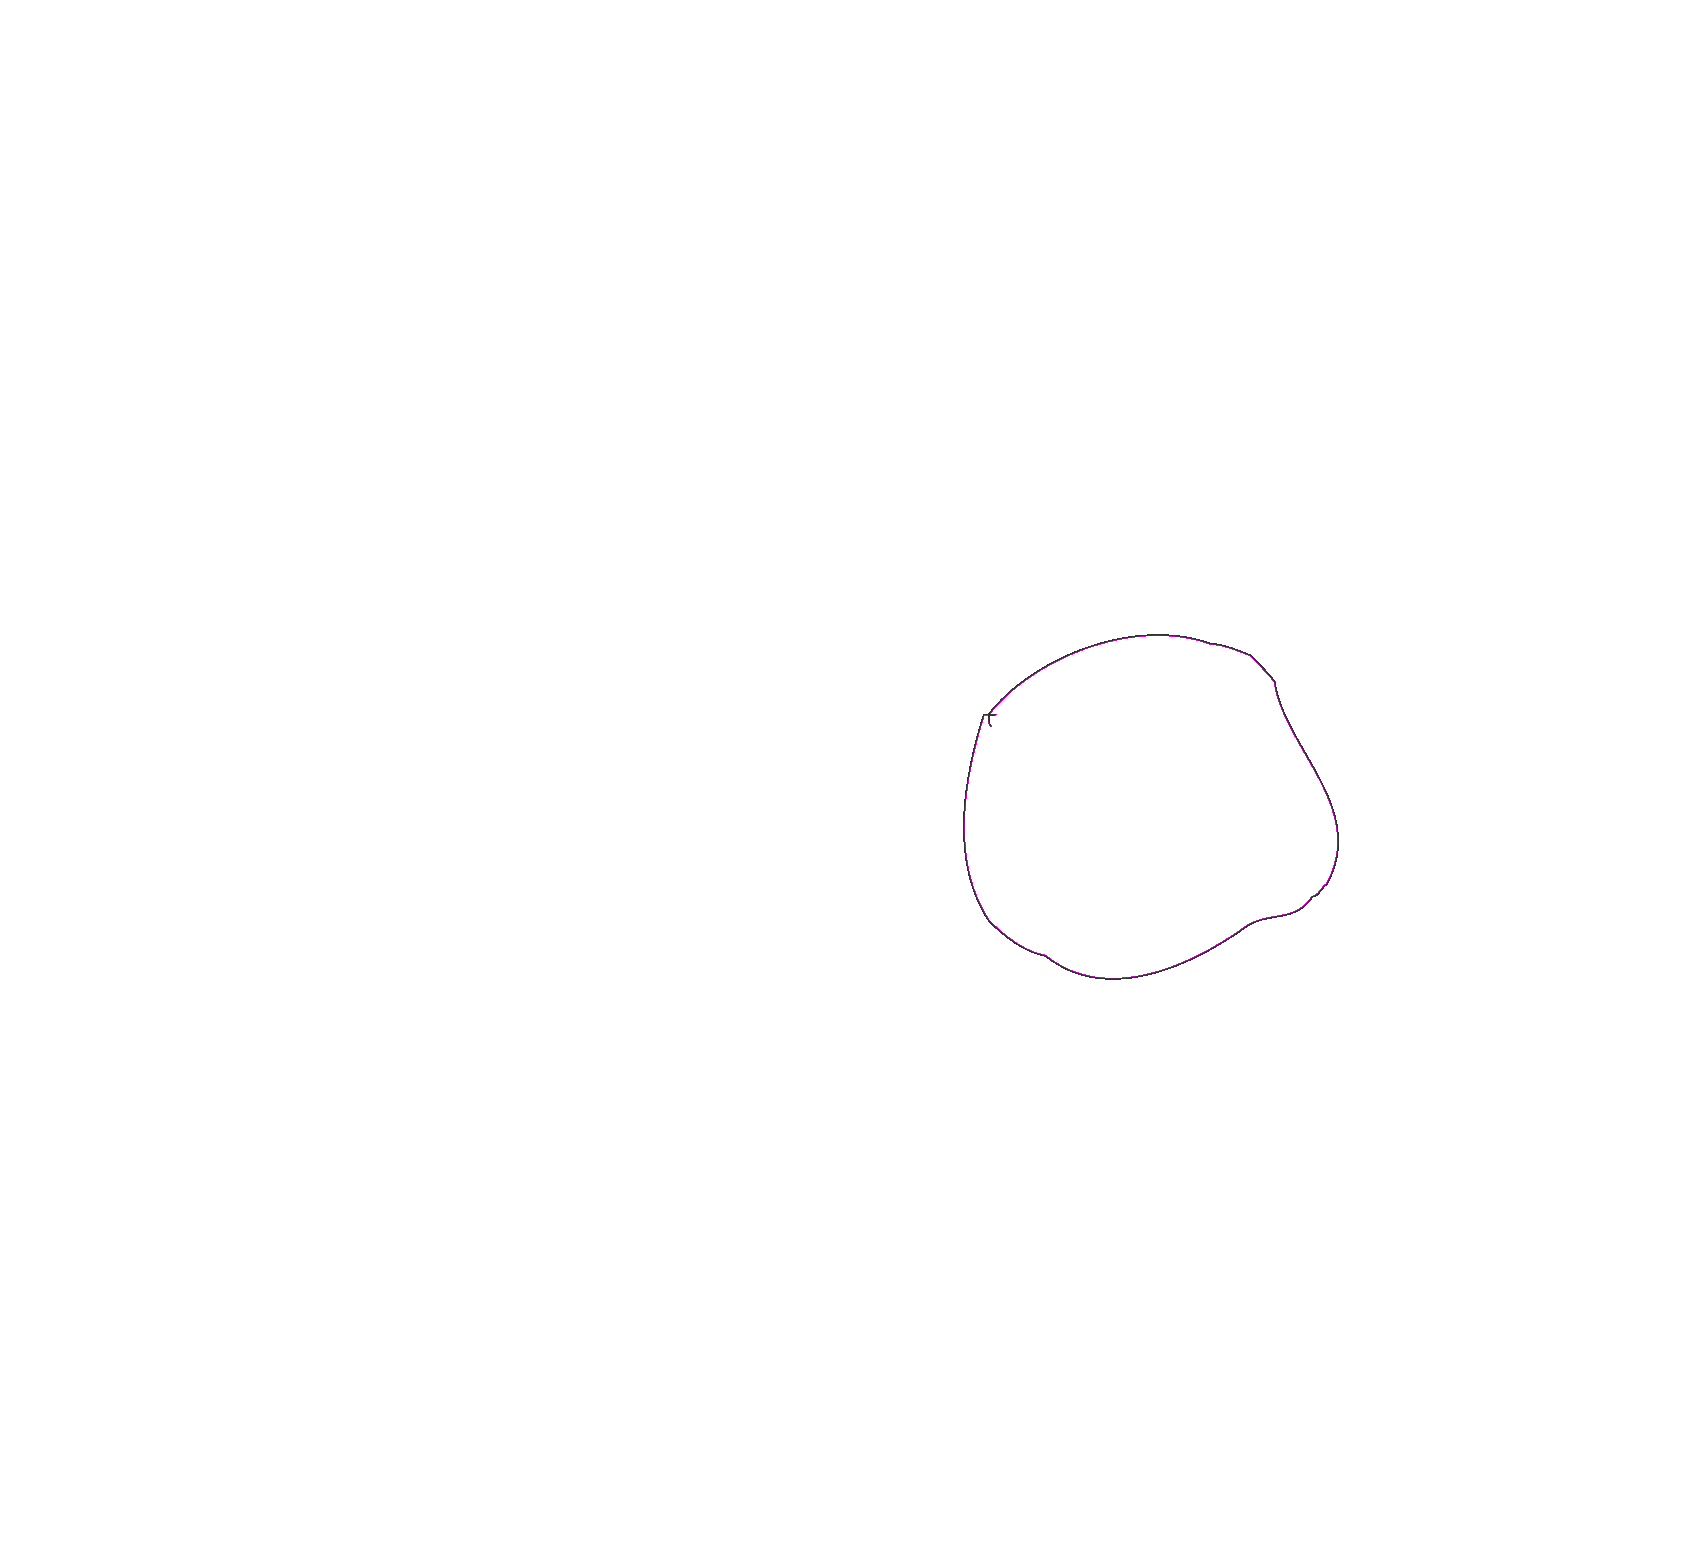

In [40]:
Image.fromarray(img)

In [37]:
np.unique(out)

array([0], dtype=uint8)

In [16]:
img[img==0]


array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [32]:
pink = [[255,0,250],[250,0,250],[250,0,255],[255,0,255],[200,50,250],[200,50,255],[250,50,255]]

out = np.copy(img)

for p in pink:
    out[img!=p] = 0

In [20]:
for file in glob.glob("../data/xray_images/*"):
    print(file)
    pass

../data/xray_images/TB 217-F1.jpg
../data/xray_images/TB 177-F3.jpg
../data/xray_images/TB 62-F2.jpg
../data/xray_images/TB 37-F3.jpg
../data/xray_images/TB 209-F1.jpg
../data/xray_images/TB 29-F3.jpg
../data/xray_images/TB 196-F0.jpg
../data/xray_images/TB 205-F1.jpg
../data/xray_images/TB 130-F2.jpg
../data/xray_images/TB 91-F1.jpg
../data/xray_images/TB 184-F0.jpg
../data/xray_images/TB 233-F0.jpg
../data/xray_images/TB 153-F2.jpg
../data/xray_images/TB 153-F3.jpg
../data/xray_images/TB 184-F1.jpg
../data/xray_images/TB 91-F0.jpg
../data/xray_images/TB 58-F2.jpg
../data/xray_images/TB 205-F0.jpg
../data/xray_images/TB 196-F1.jpg
../data/xray_images/TB 29-F2.jpg
../data/xray_images/TB 83-F0.jpg
../data/xray_images/TB 169-F2.jpg
../data/xray_images/TB 188-F1.jpg
../data/xray_images/TB 177-F2.jpg
../data/xray_images/TB 217-F0.jpg
../data/xray_images/TB 177-F0.jpg
../data/xray_images/TB 62-F1.jpg
../data/xray_images/TB 188-F3.jpg
../data/xray_images/TB 37-F0.jpg
../data/xray_images/TB 1